In [1]:
#Electricity Exports and Imports between Canada and USA

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
df = pd.read_csv ('./electricity CA.csv')
df.head()

,Year,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,1990,Exports,British Columbia,Alaska,908.956,52432.00,57.68
1,1990,Exports,British Columbia,California,3192020.200,80007662.08,25.06
2,1990,Exports,British Columbia,Idaho,106388.000,2084993.10,19.60
3,1990,Exports,British Columbia,Montana,47054.000,877249.47,18.64
4,1990,Exports,British Columbia,Nevada,2047.000,37434.09,18.29


In [4]:
#Show only two decimal place after point
pd.options.display.float_format = '{:.2f}'.format
df.head(5)

,Year,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,1990,Exports,British Columbia,Alaska,908.96,52432.00,57.68
1,1990,Exports,British Columbia,California,3192020.20,80007662.08,25.06
2,1990,Exports,British Columbia,Idaho,106388.00,2084993.10,19.60
3,1990,Exports,British Columbia,Montana,47054.00,877249.47,18.64
4,1990,Exports,British Columbia,Nevada,2047.00,37434.09,18.29


In [5]:
# Shows data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                4090 non-null   int64  
 1   Activity            4090 non-null   object 
 2   Source              4090 non-null   object 
 3   Destination         4088 non-null   object 
 4   Energy (MW.h)       4090 non-null   float64
 5   Total Value (CAN$)  4090 non-null   float64
 6   Price (CAN$/MW.h)   4090 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 223.8+ KB


In [6]:
#Remove the column "Price (CAN$/MW.h) with the data 'Confidential'"
df = df.loc[df["Price (CAN$/MW.h)"] != 'Confidential']
df.head()

,Year,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,1990,Exports,British Columbia,Alaska,908.96,52432.00,57.68
1,1990,Exports,British Columbia,California,3192020.20,80007662.08,25.06
2,1990,Exports,British Columbia,Idaho,106388.00,2084993.10,19.60
3,1990,Exports,British Columbia,Montana,47054.00,877249.47,18.64
4,1990,Exports,British Columbia,Nevada,2047.00,37434.09,18.29


In [7]:
#Check for data types
df.dtypes

Year                    int64
Activity               object
Source                 object
Destination            object
Energy (MW.h)         float64
Total Value (CAN$)    float64
Price (CAN$/MW.h)      object
dtype: object

In [8]:
#Change the data type
df["Price (CAN$/MW.h)"] = df["Price (CAN$/MW.h)"].astype("float64")
df.head(5)

,Year,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,1990,Exports,British Columbia,Alaska,908.96,52432.00,57.68
1,1990,Exports,British Columbia,California,3192020.20,80007662.08,25.06
2,1990,Exports,British Columbia,Idaho,106388.00,2084993.10,19.60
3,1990,Exports,British Columbia,Montana,47054.00,877249.47,18.64
4,1990,Exports,British Columbia,Nevada,2047.00,37434.09,18.29


In [9]:
#Check for data types
df.dtypes

Year                    int64
Activity               object
Source                 object
Destination            object
Energy (MW.h)         float64
Total Value (CAN$)    float64
Price (CAN$/MW.h)     float64
dtype: object

In [10]:
#Delete the data less than 1"
df = df.loc[df["Price (CAN$/MW.h)"] > 1]
df.head(5)

,Year,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,1990,Exports,British Columbia,Alaska,908.96,52432.00,57.68
1,1990,Exports,British Columbia,California,3192020.20,80007662.08,25.06
2,1990,Exports,British Columbia,Idaho,106388.00,2084993.10,19.60
3,1990,Exports,British Columbia,Montana,47054.00,877249.47,18.64
4,1990,Exports,British Columbia,Nevada,2047.00,37434.09,18.29


In [11]:
#Check the number of rows and columns
df.shape

(3924, 7)

In [12]:
#Check columns in dataset
df.columns

Index(['Year', 'Activity', 'Source', 'Destination', 'Energy (MW.h)',
       'Total Value (CAN$)', 'Price (CAN$/MW.h)'],
      dtype='object')

In [13]:
#Checking for missing values
df.isna().sum()

Year                  0
Activity              0
Source                0
Destination           2
Energy (MW.h)         0
Total Value (CAN$)    0
Price (CAN$/MW.h)     0
dtype: int64

In [14]:
#Drop missing values
df = df.dropna()

In [15]:
#No missing values
df.isna().sum()

Year                  0
Activity              0
Source                0
Destination           0
Energy (MW.h)         0
Total Value (CAN$)    0
Price (CAN$/MW.h)     0
dtype: int64

In [16]:
#Checking for duplicate rows -Conclusion: There are no duplicate rows present in the dataset 
df.duplicated().any()

False

In [17]:
#Viewing specific statistical metrics
df.describe()

,Year,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
count,3922.00,3922.00,3922.00,3922.00
mean,2007.36,1818458.33,86019218.31,53.43
std,8.63,5424221.85,274611983.90,75.11
min,1990.00,1.00,15.91,1.03
25%,2001.00,5354.75,231191.98,28.31
50%,2008.00,84972.00,3829217.07,42.45
75%,2015.00,932640.66,43710276.16,61.19
max,2021.00,73102688.09,4263207038.39,2841.99


In [18]:
df1 = df.drop('Year', axis = 1)
df1.head()

,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,Exports,British Columbia,Alaska,908.96,52432.00,57.68
1,Exports,British Columbia,California,3192020.20,80007662.08,25.06
2,Exports,British Columbia,Idaho,106388.00,2084993.10,19.60
3,Exports,British Columbia,Montana,47054.00,877249.47,18.64
4,Exports,British Columbia,Nevada,2047.00,37434.09,18.29


In [19]:
df2 = df1.loc[df1["Source"] != 'Total']
df3 = df2.loc[df2["Destination"] != 'Total']
df3.head()

,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,Exports,British Columbia,Alaska,908.96,52432.00,57.68
1,Exports,British Columbia,California,3192020.20,80007662.08,25.06
2,Exports,British Columbia,Idaho,106388.00,2084993.10,19.60
3,Exports,British Columbia,Montana,47054.00,877249.47,18.64
4,Exports,British Columbia,Nevada,2047.00,37434.09,18.29


In [20]:
dfe = df3.drop(['Activity', 'Source', 'Destination'], axis = 1)
dfe.head()

,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,908.96,52432.00,57.68
1,3192020.20,80007662.08,25.06
2,106388.00,2084993.10,19.60
3,47054.00,877249.47,18.64
4,2047.00,37434.09,18.29


<AxesSubplot:>

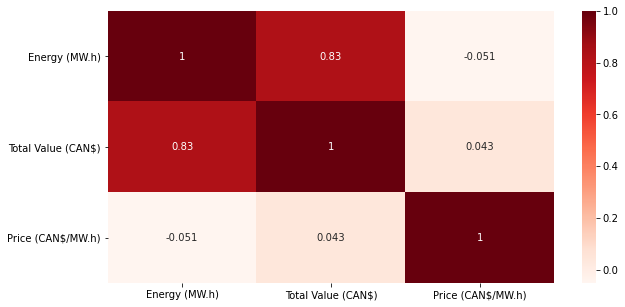

In [21]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dfe.corr(),annot=True,cmap="Reds")

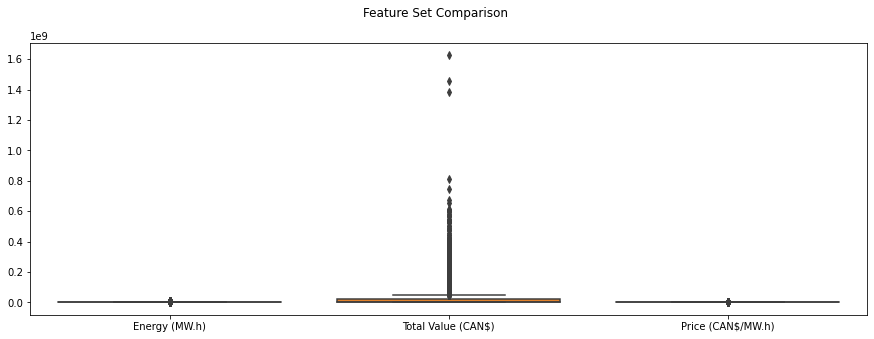

In [22]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dfe)
plt.show()

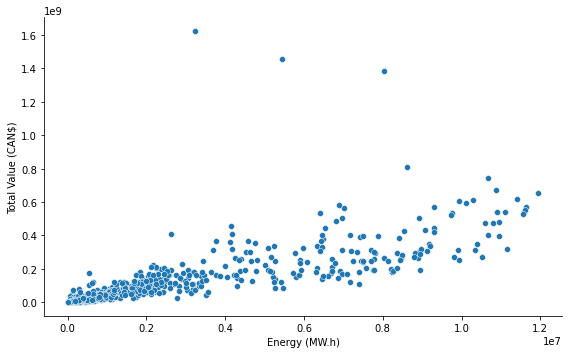

In [23]:
#Comparing Values that are related with other variables
g = sns.pairplot(dfe, x_vars = 'Energy (MW.h)', y_vars= 'Total Value (CAN$)', aspect=1, kind='scatter',)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

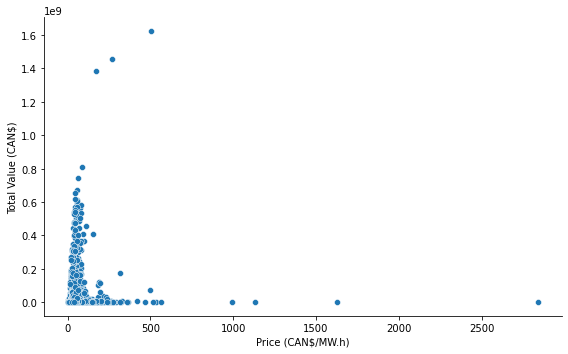

In [24]:
#Comparing Values that are related with other variables
g = sns.pairplot(dfe, x_vars = 'Price (CAN$/MW.h)', y_vars = 'Total Value (CAN$)', aspect=1, kind='scatter',)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

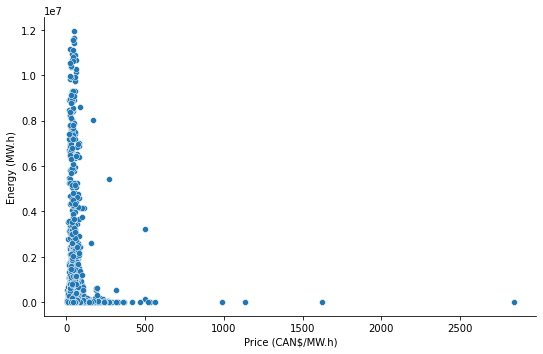

In [25]:
#Comparing Values that are related with other variables
g = sns.pairplot(dfe, x_vars = 'Price (CAN$/MW.h)', y_vars = 'Energy (MW.h)', aspect=1, kind='scatter',)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

In [26]:
dfe.to_csv('/Users/ismailsever/Desktop/DC/electricity CA v1.csv')